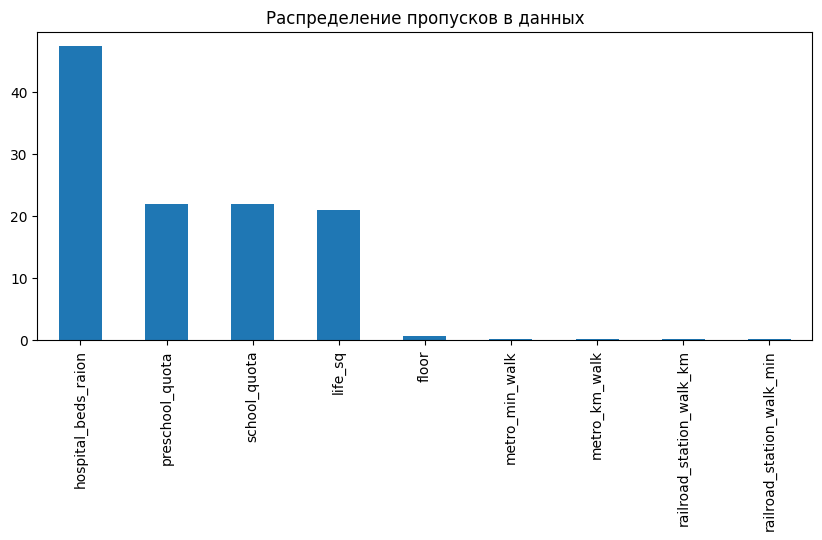

In [1]:
# PYTHON-14. Очистка данных
# 2. Знакомство с новыми данными: данные о квартирах от Сбера

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

sber_data = pd.read_csv('data/sber_data.csv')

# 2.1
# print(sber_data.shape)
# print(sber_data.info())

cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
# display(cols_with_null)
# print(cols_with_null)

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

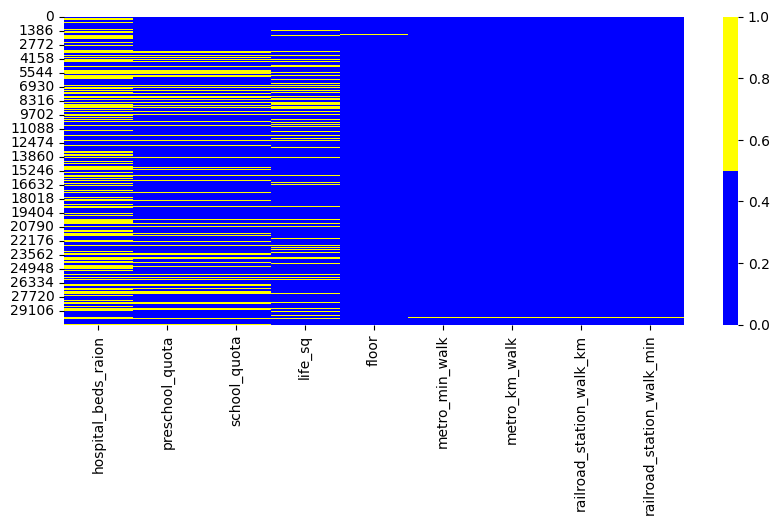

In [2]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [3]:
drop_data = sber_data.copy()
thresh = drop_data.shape[0] * 0.7
drop_data = drop_data.dropna(thresh=thresh, axis=1)
print(drop_data.shape)
drop_data = drop_data.dropna(how='any', axis=0)
print(drop_data.shape)
# drop_data.isnull().mean()

(30471, 60)
(20888, 60)


array([[<AxesSubplot: title={'center': 'hospital_beds_raion'}>,
        <AxesSubplot: title={'center': 'preschool_quota'}>,
        <AxesSubplot: title={'center': 'school_quota'}>],
       [<AxesSubplot: title={'center': 'life_sq'}>,
        <AxesSubplot: title={'center': 'floor'}>,
        <AxesSubplot: title={'center': 'metro_min_walk'}>],
       [<AxesSubplot: title={'center': 'metro_km_walk'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_km'}>,
        <AxesSubplot: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

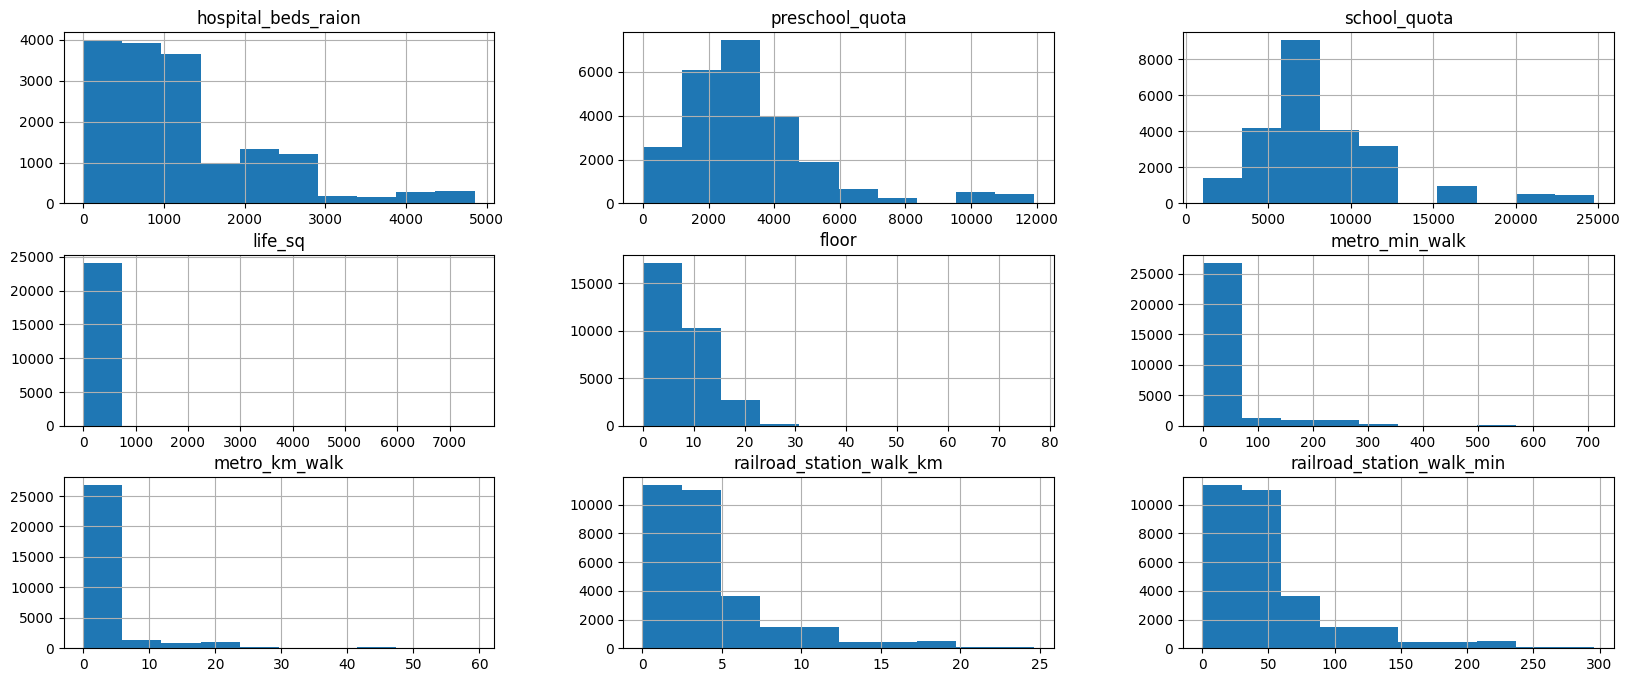

In [4]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8));